<table class="table table-bordered">
<tr>
<th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Machine Learning</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the packages
# import the pacakges

import numpy as np
import pandas as pd
from datetime import datetime

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

# for Q-Q plots
import scipy.stats as stats


from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from scipy.stats import pointbiserialr
from sklearn.feature_extraction.text import CountVectorizer

# to impute missing data with feature-engine
import feature_engine.imputation as mdi
from feature_engine.imputation import MeanMedianImputer
from sklearn.pipeline import Pipeline

# with open-source packages
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from sklearn.preprocessing import LabelEncoder

#for name_eval
from nltk.corpus import stopwords
import re

# for discretization
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')



## 1. HR Analytics

### 1.1 Load and Explore the data

#### 1.1.1 Basic Cleaning

In [2]:
hr_df = pd.read_csv('./hr_data.csv')

hr_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
na_percentages = (hr_df.isna().mean() * 100).round(2)

# Display the percentages of NA values
print("Percentage of NA values in each column:")
print(na_percentages)

Percentage of NA values in each column:
employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64


In [5]:
hr_df['region'] = hr_df['region'].str.replace('region_', '').astype(int)

print(hr_df['region'])

0         7
1        22
2        19
3        23
4        26
         ..
54803    14
54804    27
54805     1
54806     9
54807    22
Name: region, Length: 54808, dtype: int32


In [6]:
hr_df.rename(columns={'awards_won?': 'awards_won'}, inplace=True)

#### 1.1.2 Statistical Analysis

In [7]:
numerical_columns = hr_df.describe().columns
print(numerical_columns)

Index(['employee_id', 'region', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')


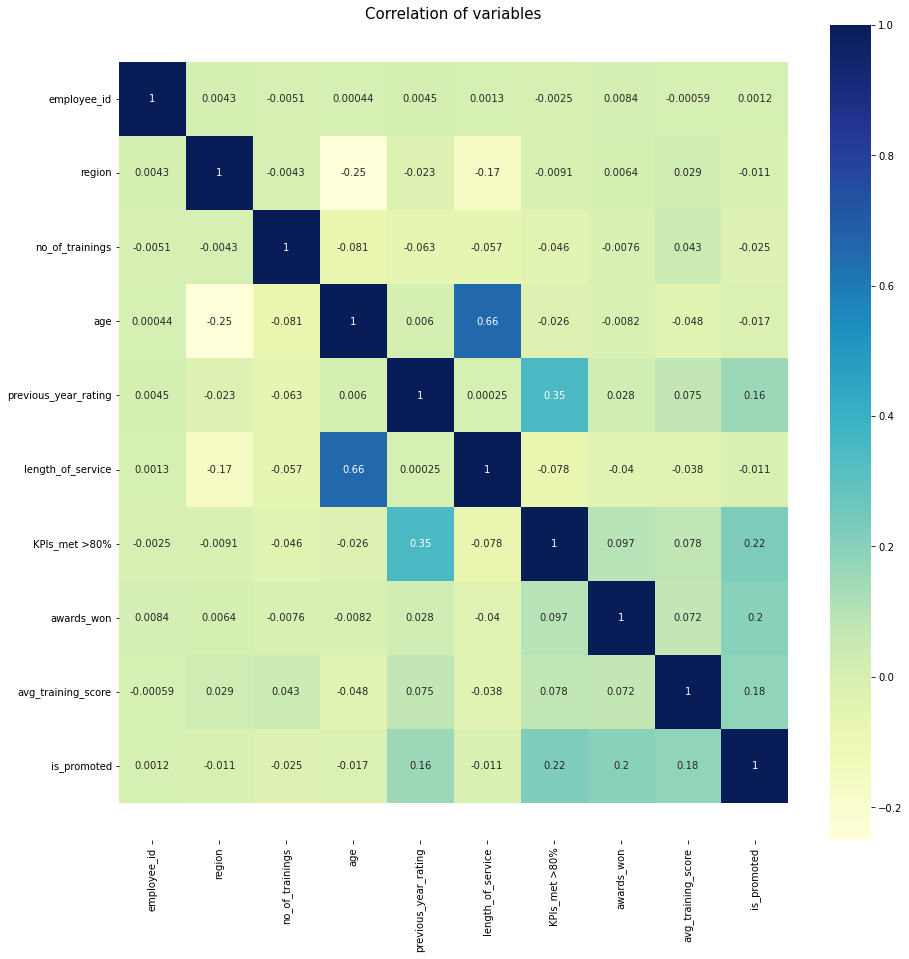

In [8]:
plt.figure(figsize=(15,15))
plt.title('Correlation of variables', size=15)
ax = sns.heatmap(hr_df[numerical_columns].astype(float).corr(), cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

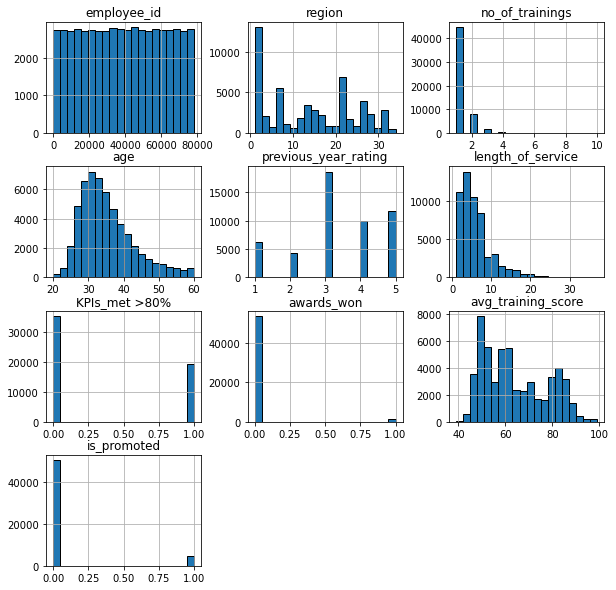

In [9]:
hr_df.hist(edgecolor='black', linewidth=1, figsize=(10, 10), bins = 20)
plt.show()

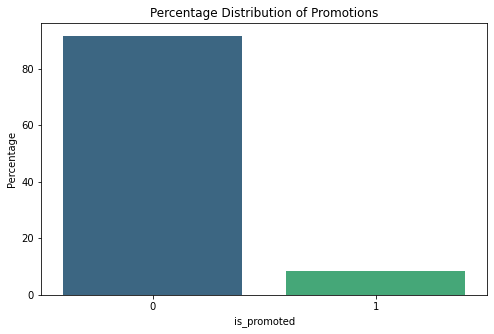

In [10]:
percentage_promoted = hr_df['is_promoted'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=percentage_promoted.index, y=percentage_promoted.values, palette='viridis')

# Add labels and title
plt.title('Percentage Distribution of Promotions')
plt.xlabel('is_promoted')
plt.ylabel('Percentage')

# Display the plot
plt.show()

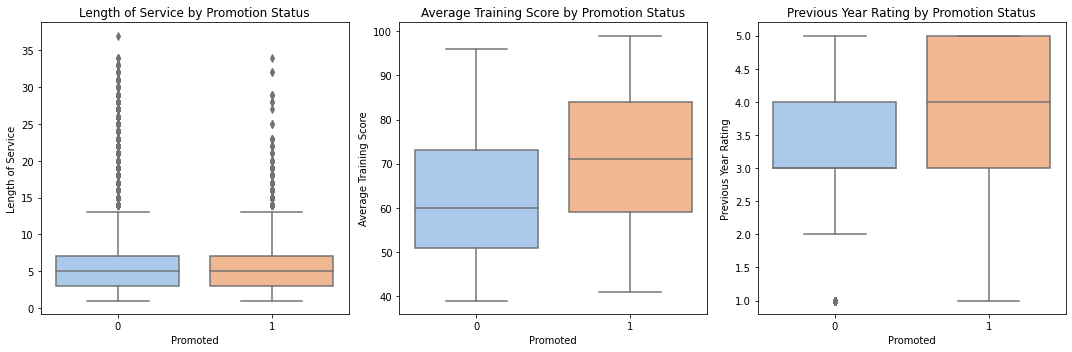

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot for length_of_service
sns.boxplot(x="is_promoted", y="length_of_service", data=hr_df, ax=axes[0], palette='pastel')
axes[0].set_title("Length of Service by Promotion Status")
axes[0].set_xlabel("Promoted")
axes[0].set_ylabel("Length of Service")

# Boxplot for avg_training_score
sns.boxplot(x="is_promoted", y="avg_training_score", data=hr_df, ax=axes[1], palette='pastel')
axes[1].set_title("Average Training Score by Promotion Status")
axes[1].set_xlabel("Promoted")
axes[1].set_ylabel("Average Training Score")

# Boxplot for previous_year_rating
sns.boxplot(x="is_promoted", y="previous_year_rating", data=hr_df, ax=axes[2], palette='pastel')
axes[2].set_title("Previous Year Rating by Promotion Status")
axes[2].set_xlabel("Promoted")
axes[2].set_ylabel("Previous Year Rating")

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

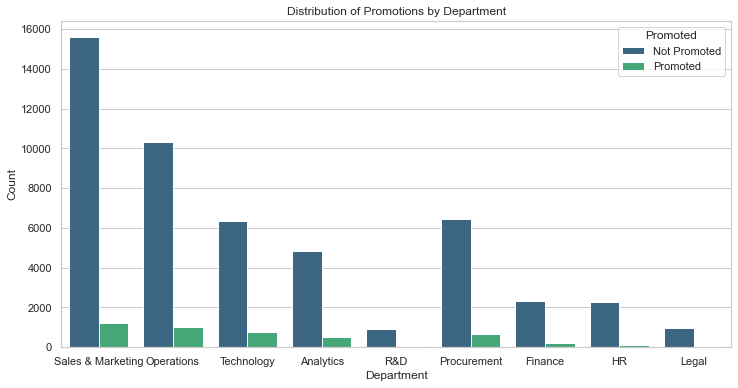

In [12]:
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='department', hue='is_promoted', data=hr_df, palette='viridis')

# Add labels and title
plt.title('Distribution of Promotions by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])


# Show the plot
plt.show()

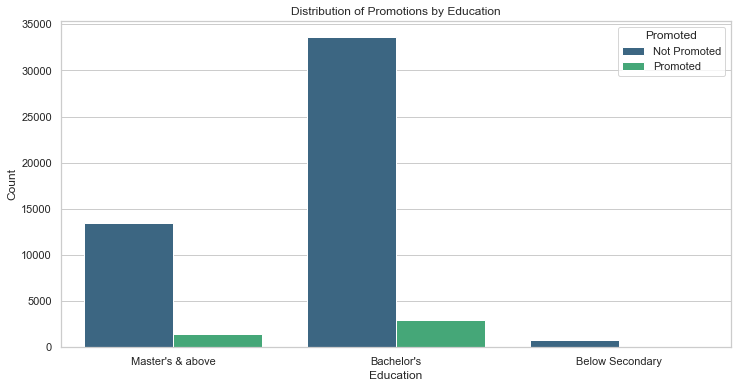

In [13]:
sns.set(style="whitegrid")

# Create a countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='is_promoted', data=hr_df, palette='viridis')

# Add labels and title
plt.title('Distribution of Promotions by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Promoted', labels=['Not Promoted', 'Promoted'])


# Show the plot
plt.show()

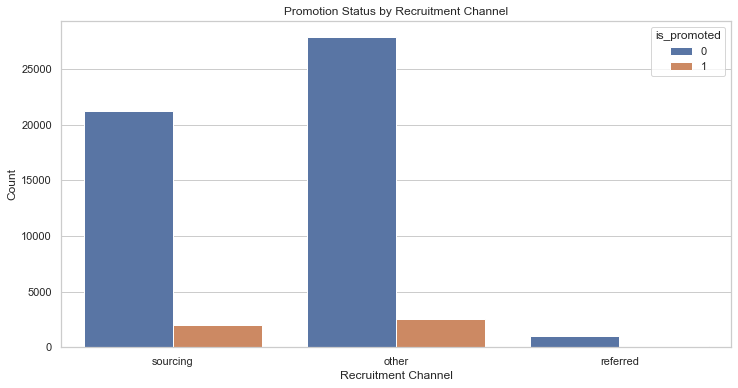

In [14]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='recruitment_channel', hue='is_promoted', data=hr_df)
plt.title('Promotion Status by Recruitment Channel')
plt.xlabel('Recruitment Channel')
plt.ylabel('Count')
plt.show()

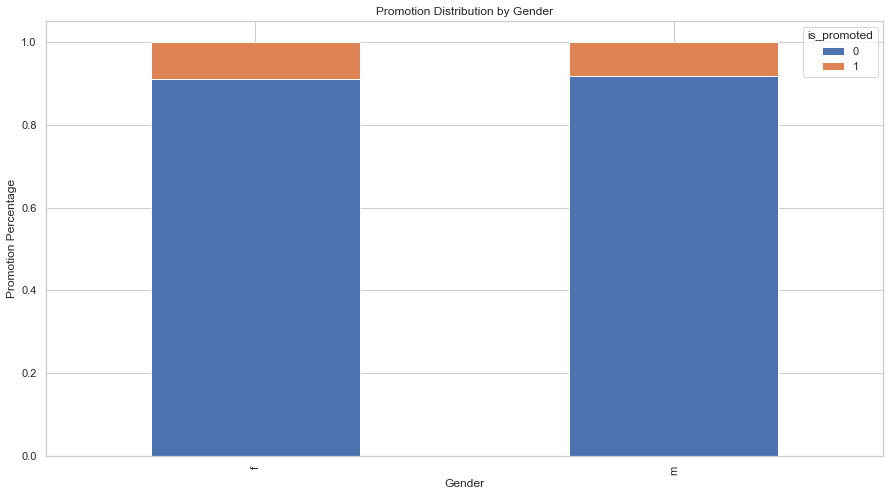

In [15]:
# Creating a cross-tabulation of 'gender' and 'is_promoted' columns
promotion_cross_tab = pd.crosstab(hr_df['gender'], hr_df['is_promoted'])

# Normalizing the data for better representation
normalized_data = promotion_cross_tab.div(promotion_cross_tab.sum(1).astype(float), axis=0)

# Plotting a stacked bar chart for visualizing promotion distribution
fig, ax = plt.subplots(figsize=(15, 8))
normalized_data.plot(kind='bar', stacked=True, ax=ax)

# Adding labels and title for better clarity
ax.set_xlabel('Gender')
ax.set_ylabel('Promotion Percentage')
ax.set_title('Promotion Distribution by Gender')

# Displaying the plot
plt.show()

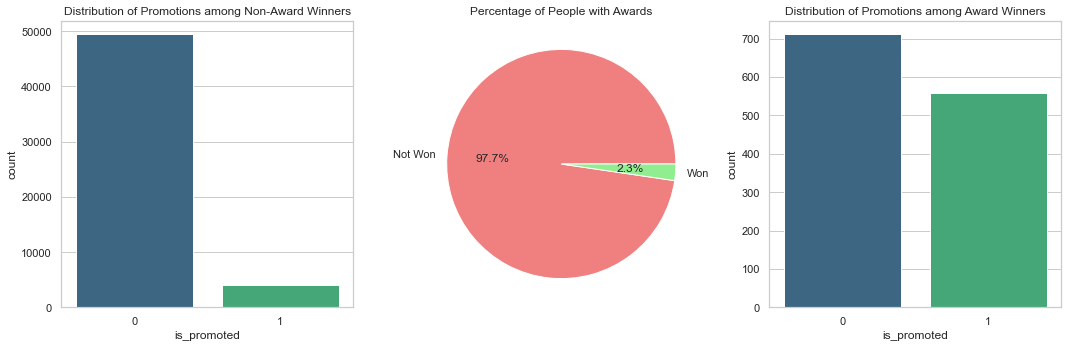

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart for the percentage of award winners
ax0 = axes[1]
award_counts = hr_df['awards_won'].value_counts(normalize=True)
ax0.pie(award_counts, labels=['Not Won', 'Won'], autopct='%1.1f%%', startangle=0, colors=['lightcoral', 'lightgreen'])
ax0.set_title('Percentage of People with Awards')

# Bar chart for promoted among award winners
ax1 = axes[2]
sns.countplot(x='is_promoted', data=hr_df[hr_df['awards_won'] == 1], ax=ax1, palette='viridis')
ax1.set_title('Distribution of Promotions among Award Winners')

# Bar chart for promoted among non-award winners
ax2 = axes[0]
sns.countplot(x='is_promoted', data=hr_df[hr_df['awards_won'] == 0], ax=ax2, palette='viridis')
ax2.set_title('Distribution of Promotions among Non-Award Winners')

# Adjust layout
plt.tight_layout()
plt.show()


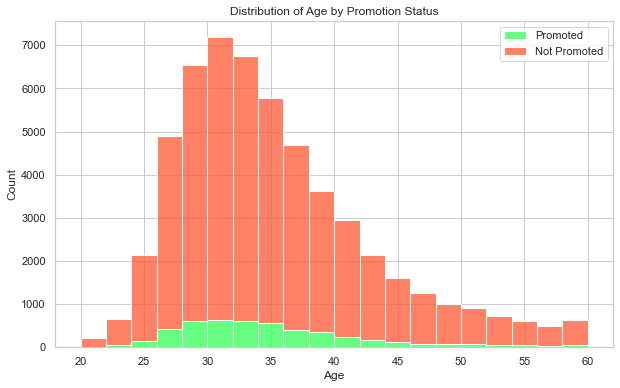

In [17]:
# Switch colors for promoted and not promoted
palette = {0: '#FF5733', 1: '#33FF57'}

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=hr_df, x='age', hue='is_promoted', multiple='stack', bins=20, palette=palette)
plt.title('Distribution of Age by Promotion Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Promoted','Not Promoted'])
plt.show()

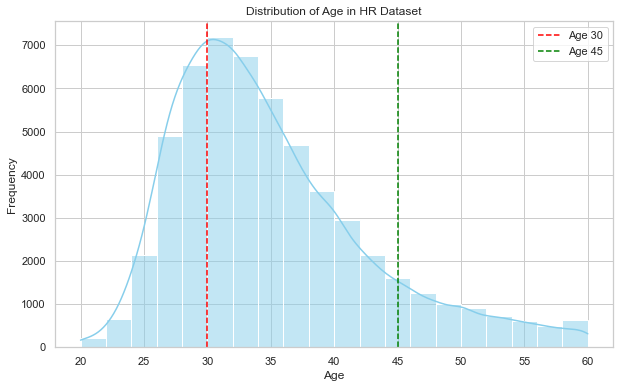

In [18]:
sns.set(style="whitegrid")

# Create a histogram to show the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(hr_df['age'], bins=20, kde=True, color='skyblue')

# Add vertical lines at ages 30 and 45
plt.axvline(x=30, linestyle='--', color='red', label='Age 30')
plt.axvline(x=45, linestyle='--', color='green', label='Age 45')

# Add labels and title
plt.title('Distribution of Age in HR Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Show the plot
plt.show()

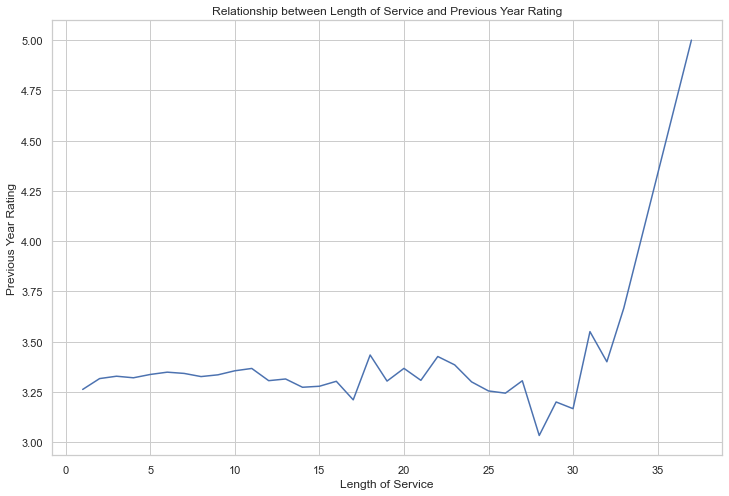

In [19]:
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='length_of_service', y='previous_year_rating', data=hr_df, ci=None)

# Add labels and title
plt.title('Relationship between Length of Service and Previous Year Rating')
plt.xlabel('Length of Service')
plt.ylabel('Previous Year Rating')

# Show the plot
plt.show()

6-10     21629
3-5      20553
11-15     5139
0-2       4547
16-20     2294
20+        646
Name: experience_level, dtype: int64


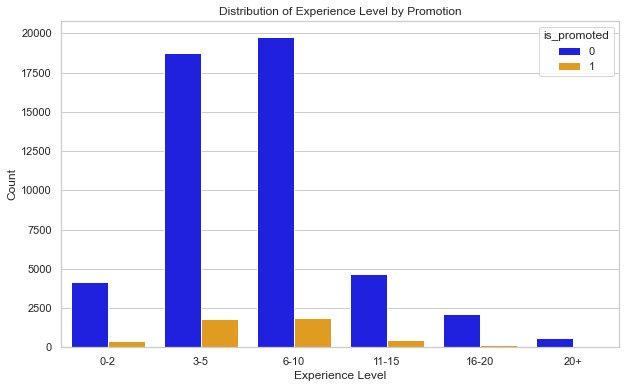

In [20]:
# Create a new feature 'experience_level' based on 'length_of_service'
hr_df['experience_level'] = pd.cut(hr_df['length_of_service'],
                                   bins=[0, 2, 5, 10, 15, 20, float('inf')],
                                   labels=['0-2', '3-5', '6-10', '11-15', '16-20', '20+'],
                                   right=False)

# Check the distribution of the new feature
print(hr_df['experience_level'].value_counts())

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_level', hue='is_promoted', data=hr_df, palette={0: 'blue', 1: 'orange'})
plt.title('Distribution of Experience Level by Promotion')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

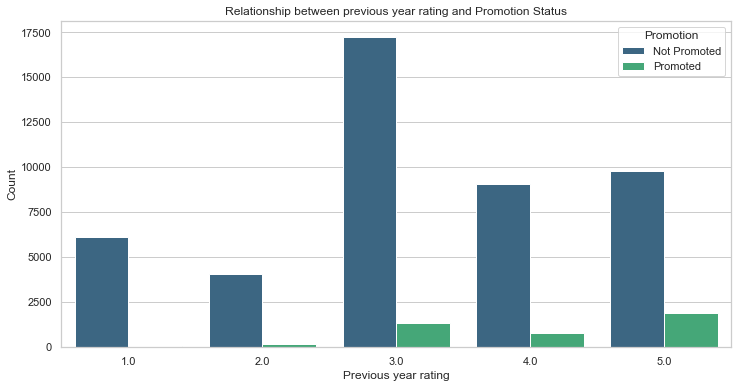

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='previous_year_rating', hue='is_promoted', data=hr_df, palette='viridis')
plt.title('Relationship between previous year rating and Promotion Status')
plt.xlabel('Previous year rating')
plt.ylabel('Count')
plt.legend(title='Promotion', labels=['Not Promoted', 'Promoted'])
plt.show()

Text(0.5, 1.0, 'Number of Trainings')

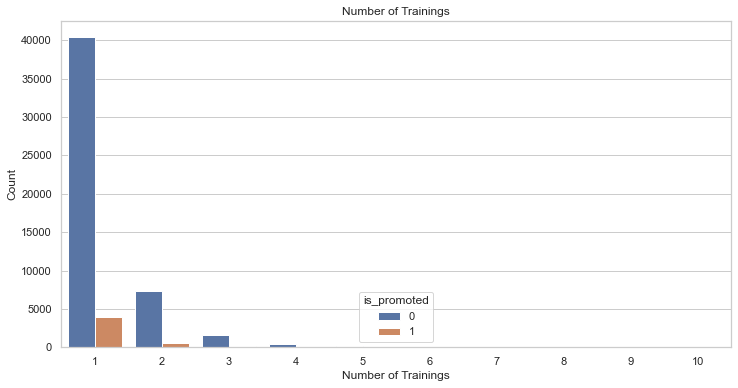

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='no_of_trainings', hue='is_promoted', data=hr_df)

# Set labels and title
plt.xlabel('Number of Trainings')
plt.ylabel('Count')
plt.title('Number of Trainings')

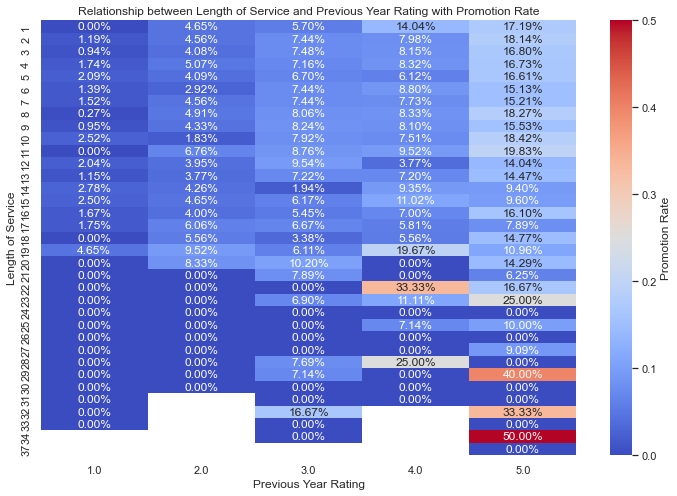

In [23]:
# Create a pivot table for better visualization
pivot_table = hr_df.pivot_table(index='length_of_service', columns='previous_year_rating', values='is_promoted', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2%", cbar_kws={'label': 'Promotion Rate'})
plt.title('Relationship between Length of Service and Previous Year Rating with Promotion Rate')
plt.xlabel('Previous Year Rating')
plt.ylabel('Length of Service')
plt.show()

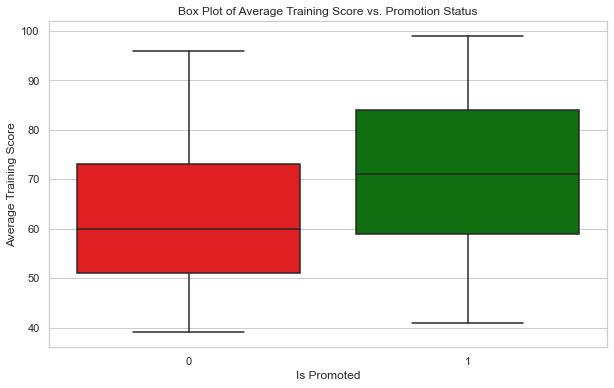

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_promoted', y='avg_training_score', data=hr_df, palette={0: 'red', 1: 'green'})
plt.title('Box Plot of Average Training Score vs. Promotion Status')
plt.xlabel('Is Promoted')
plt.ylabel('Average Training Score')
plt.show()

In [25]:
hr_df['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

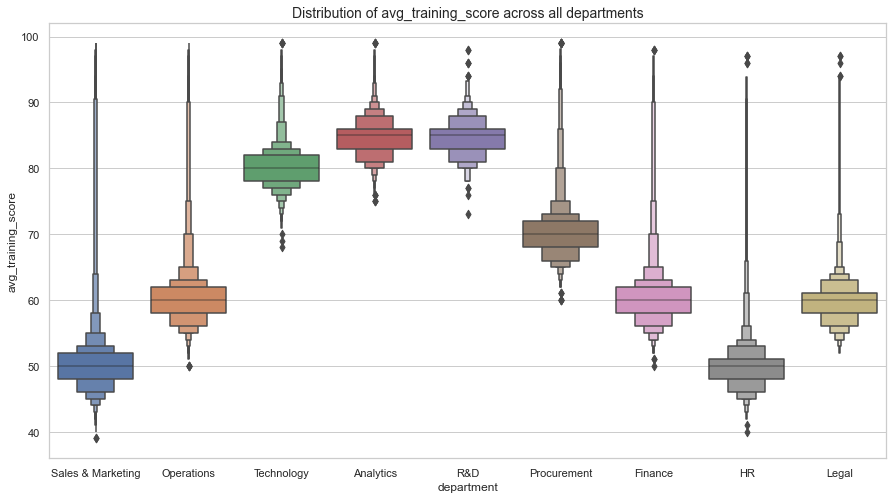

In [26]:
plt.figure(figsize =(15,8))

sns.boxenplot(x = 'department', y = 'avg_training_score', data=hr_df)
plt.title("Distribution of avg_training_score across all departments", fontsize = '14')
plt.show()

### 1.2 Cleanse and Transform the data

#### 1.2.1 Handling null values

In [27]:
rows_with_na = hr_df[hr_df.isna().any(axis=1)]

# Print or display the resulting DataFrame
print(rows_with_na)

       employee_id         department  region   education gender  \
10           29934         Technology      23         NaN      m   
21           33332         Operations      15         NaN      m   
23           71177        Procurement       5  Bachelor's      m   
29           74759  Sales & Marketing       4  Bachelor's      m   
32           35465  Sales & Marketing       7         NaN      f   
...            ...                ...     ...         ...    ...   
54742        38935  Sales & Marketing      31         NaN      m   
54746        10546            Finance       6  Bachelor's      m   
54773        37919            Finance       2  Bachelor's      m   
54801        12431         Technology      26  Bachelor's      f   
54806        13614  Sales & Marketing       9         NaN      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
10               sourcing                1   30                   NaN   
21               sourcing            

In [28]:
na_percentages = (hr_df.isna().mean() * 100).round(2)

# Display the percentages of NA values
print("Percentage of NA values in each column:")
print(na_percentages)

Percentage of NA values in each column:
employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won              0.00
avg_training_score      0.00
is_promoted             0.00
experience_level        0.00
dtype: float64


In [29]:
rows_with_null_rating = hr_df[hr_df['previous_year_rating'].isnull()]

# Display the resulting DataFrame
print(rows_with_null_rating)


       employee_id         department  region   education gender  \
10           29934         Technology      23         NaN      m   
23           71177        Procurement       5  Bachelor's      m   
29           74759  Sales & Marketing       4  Bachelor's      m   
56           45709  Sales & Marketing      31  Bachelor's      f   
58           26599  Sales & Marketing      16  Bachelor's      m   
...            ...                ...     ...         ...    ...   
54703        74615                R&D      31  Bachelor's      m   
54734        11685         Operations      15  Bachelor's      m   
54746        10546            Finance       6  Bachelor's      m   
54773        37919            Finance       2  Bachelor's      m   
54801        12431         Technology      26  Bachelor's      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
10               sourcing                1   30                   NaN   
23                  other            

In [30]:
# replace null values in previous year rating with 0
hr_df['previous_year_rating'] = hr_df['previous_year_rating'].fillna(0)
# check if nulls have been replaced
hr_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won                 0
avg_training_score         0
is_promoted                0
experience_level           0
dtype: int64

In [31]:
hr_df['previous_year_rating'].unique()

array([5., 3., 1., 4., 0., 2.])

In [32]:
# replace null values in education with the mode
hr_df['education'] = hr_df['education'].fillna(hr_df['education'].mode()[0])
# check if nulls have been replaced
hr_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won              0
avg_training_score      0
is_promoted             0
experience_level        0
dtype: int64

#### 1.2.2 Handling outliers

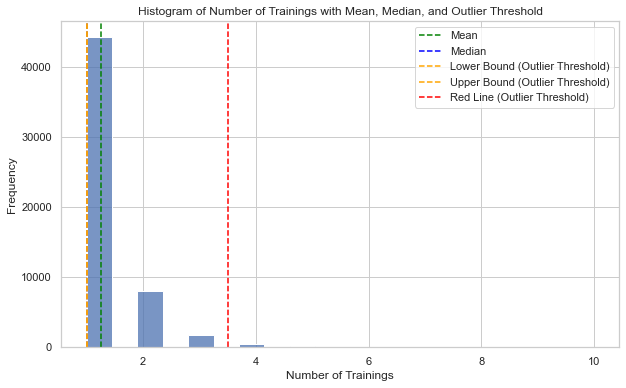

In [33]:
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(hr_df['no_of_trainings'], bins=20, kde=False)

# Calculate mean, median, and interquartile range
mean_value = hr_df['no_of_trainings'].mean()
median_value = hr_df['no_of_trainings'].median()
q1 = hr_df['no_of_trainings'].quantile(0.25)
q3 = hr_df['no_of_trainings'].quantile(0.75)
iqr = q3 - q1

# Plot mean line
plt.axvline(x=mean_value, color='green', linestyle='--', label='Mean')

# Plot median line
plt.axvline(x=median_value, color='blue', linestyle='--', label='Median')

# Plot interquartile range (IQR)
plt.axvline(x=q1 - 1.5 * iqr, color='orange', linestyle='--', label='Lower Bound (Outlier Threshold)')
plt.axvline(x=q3 + 1.5 * iqr, color='orange', linestyle='--', label='Upper Bound (Outlier Threshold)')

# Plot red line for the outlier threshold
plt.axvline(x=3.5, color='red', linestyle='--', label='Red Line (Outlier Threshold)')

# Set labels and title
plt.xlabel('Number of Trainings')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Trainings with Mean, Median, and Outlier Threshold')
plt.legend()

# Show the plot
plt.show()

In [34]:
lower_threshold = 0  # Set your lower threshold
upper_threshold = 3.5  # Set your upper threshold

# Filter the DataFrame
hr_df = hr_df[(hr_df['no_of_trainings'] >= lower_threshold) & (hr_df['no_of_trainings'] <= upper_threshold)]

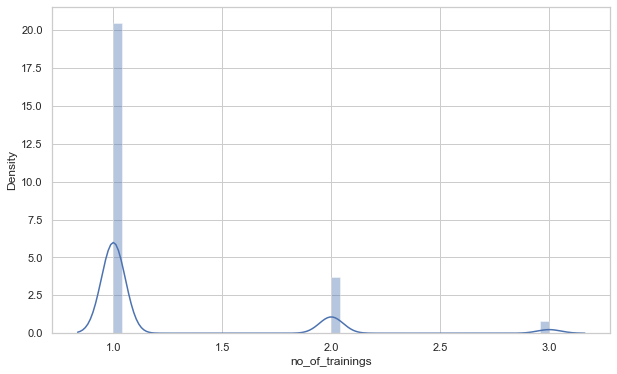

In [35]:
fig = plt.figure(figsize=(10,6))
sns.distplot(hr_df['no_of_trainings'])
plt.show()

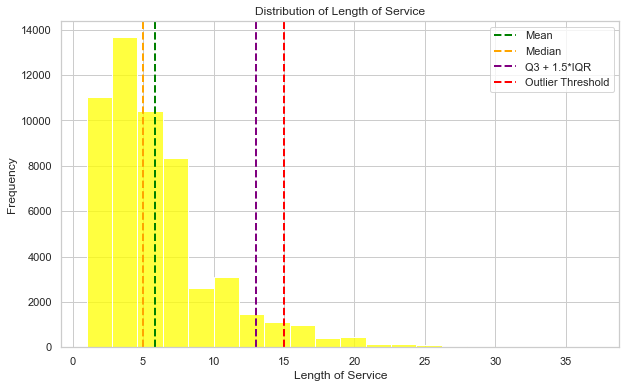

In [36]:
sns.set(style="whitegrid")

# Set the outlier threshold for length_of_service
length_of_service_outlier_threshold = 15

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram
sns.histplot(hr_df['length_of_service'], bins=20, kde=False, color='yellow', ax=ax)

# Add mean, median, and IQR lines
ax.axvline(hr_df['length_of_service'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(hr_df['length_of_service'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')

q1 = hr_df['length_of_service'].quantile(0.25)
q3 = hr_df['length_of_service'].quantile(0.75)
iqr = q3 - q1

ax.axvline(q3 + 1.5 * iqr, color='purple', linestyle='dashed', linewidth=2, label='Q3 + 1.5*IQR')

# Add outlier threshold line
ax.axvline(length_of_service_outlier_threshold, color='red', linestyle='dashed', linewidth=2, label='Outlier Threshold')

# Set labels and title
ax.set_xlabel('Length of Service')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Length of Service')
    
# Add legend
ax.legend()

# Show the plot
plt.show()

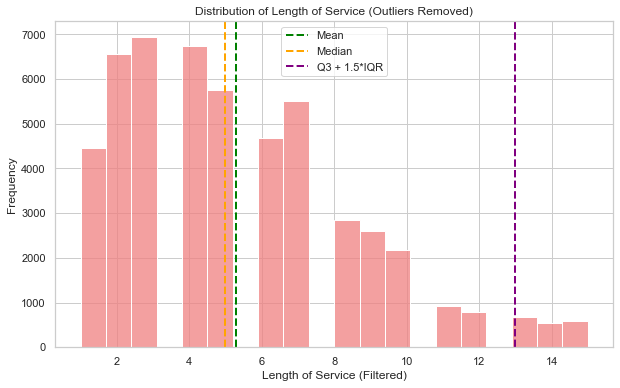

In [37]:
length_of_service_outlier_threshold = 15

# Remove outliers
hr_df = hr_df[hr_df['length_of_service'] <= length_of_service_outlier_threshold]

# Set the style for the plot
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram after removing outliers
sns.histplot(hr_df['length_of_service'], bins=20, kde=False, color='lightcoral', ax=ax)

# Add mean, median, and IQR lines
ax.axvline(hr_df['length_of_service'].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(hr_df['length_of_service'].median(), color='orange', linestyle='dashed', linewidth=2, label='Median')

q1 = hr_df['length_of_service'].quantile(0.25)
q3 = hr_df['length_of_service'].quantile(0.75)
iqr = q3 - q1

ax.axvline(q3 + 1.5 * iqr, color='purple', linestyle='dashed', linewidth=2, label='Q3 + 1.5*IQR')

# Set labels and title
ax.set_xlabel('Length of Service (Filtered)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Length of Service (Outliers Removed)')

# Add legend
ax.legend()

# Show the plot
plt.show()

#### 1.2.5 Transforming age related columns

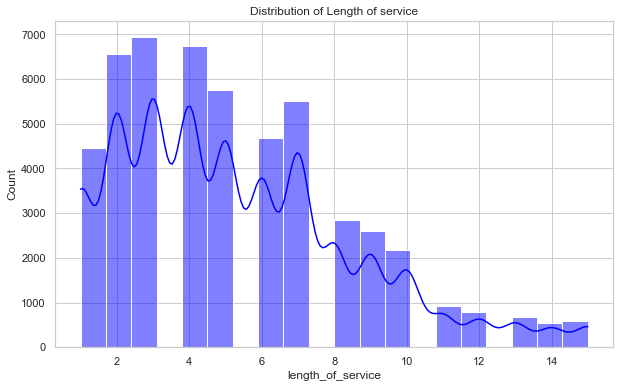

In [38]:
sns.set(style="whitegrid")

# Create a histogram for the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(hr_df['length_of_service'], bins=20, kde=True, color='blue')

# Add labels and title
plt.title('Distribution of Length of service')
plt.xlabel('length_of_service')
plt.ylabel('Count')
# Show the plot
plt.show()

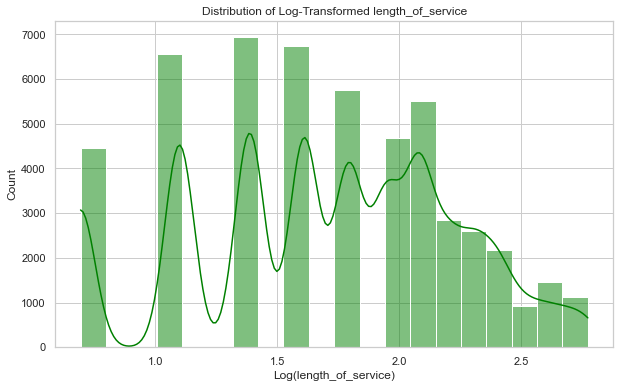

In [39]:
sns.set(style="whitegrid")

# Log-transform the 'age' column
hr_df['length_of_service'] = np.log1p(hr_df['length_of_service'])

# Create a histogram for the log-transformed age
plt.figure(figsize=(10, 6))
sns.histplot(hr_df['length_of_service'], bins=20, kde=True, color='green')

# Add labels and title
plt.title('Distribution of Log-Transformed length_of_service')
plt.xlabel('Log(length_of_service)')
plt.ylabel('Count')

# Show the plot|
plt.show()

#### 1.2.5 Feature Engineering

In [40]:
# hr_df['experience_level'] = pd.cut(hr_df['length_of_service'],
#                                    bins=[0, 2, 5, 10, 15, 20, float('inf')],
#                                    labels=['0-2', '3-5', '6-10', '11-15', '16-20', '20+'],
#                                    right=False)


In [41]:
age_bins = [20, 30, 40, 50, 60]
age_labels = ['Young', 'Mid-Age', 'Senior', 'Elder']

# Create the 'Age Group' column
hr_df['age_group'] = pd.cut(hr_df['age'], bins=age_bins, labels=age_labels, right=False)

# Display the updated DataFrame
print(hr_df[['age', 'age_group']])

       age age_group
0       35   Mid-Age
1       30   Mid-Age
2       34   Mid-Age
3       39   Mid-Age
4       45    Senior
...    ...       ...
54802   31   Mid-Age
54804   37   Mid-Age
54805   27     Young
54806   29     Young
54807   27     Young

[51812 rows x 2 columns]


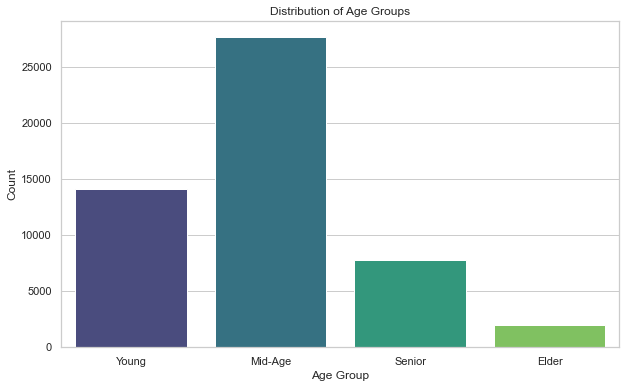

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_df, x='age_group', palette='viridis')

# Adding labels and title
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Display the plot
plt.show()

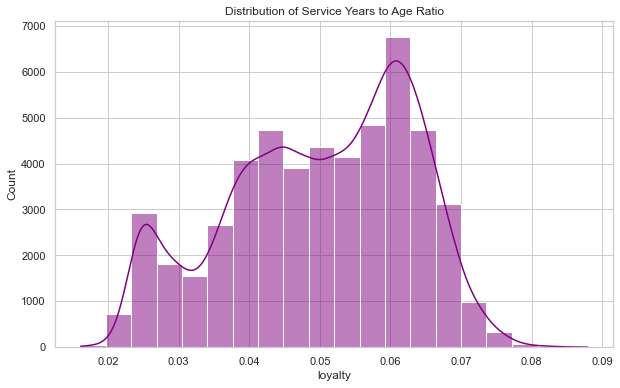

In [43]:
hr_df['loyalty'] = hr_df['length_of_service'] / hr_df['age']

# Plot a histogram to visualize the distribution of the new feature
plt.figure(figsize=(10, 6))
sns.histplot(data=hr_df, x='loyalty', bins=20, kde=True, color='purple')
plt.title('Distribution of Service Years to Age Ratio')
plt.xlabel('loyalty')
plt.ylabel('Count')
plt.show()    

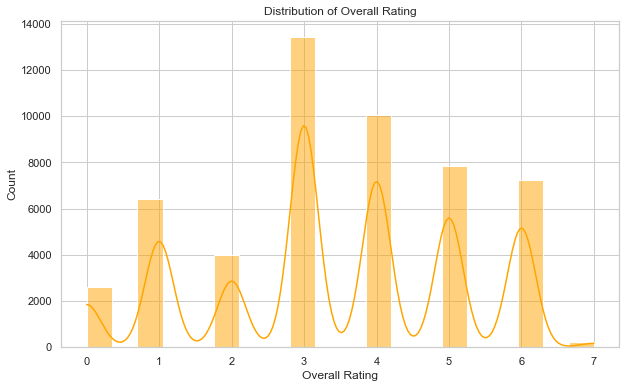

In [44]:
hr_df['overall_rating'] = (hr_df['previous_year_rating'] + hr_df['KPIs_met >80%'] + hr_df['awards_won']).fillna(0)

# Plot a histogram to visualize the distribution of the new feature
plt.figure(figsize=(10, 6))
sns.histplot(data=hr_df, x='overall_rating', bins=20, kde=True, color='orange')
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.show()

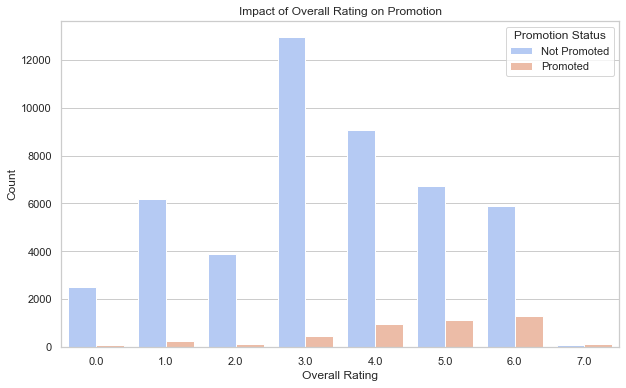

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=hr_df, x='overall_rating', hue='is_promoted', palette='coolwarm')
plt.title('Impact of Overall Rating on Promotion')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.legend(title='Promotion Status', labels=['Not Promoted', 'Promoted'])
plt.show()

In [46]:
# Create the Training Intensity feature
hr_df['training_intensity'] = hr_df['no_of_trainings'] * hr_df['avg_training_score']

# Check the new feature in the DataFrame
print(hr_df[['no_of_trainings', 'avg_training_score', 'training_intensity']].head())

   no_of_trainings  avg_training_score  training_intensity
0                1                  49                  49
1                1                  60                  60
2                1                  50                  50
3                2                  50                 100
4                1                  73                  73


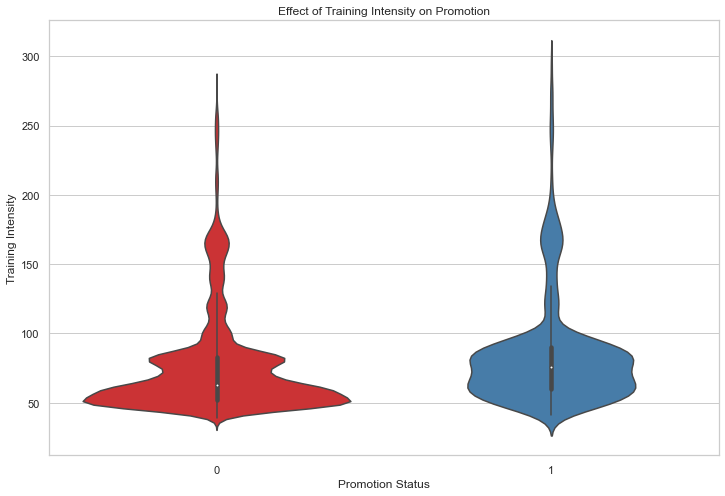

In [47]:
sns.set(style="whitegrid")

# Create a violin plot for Training Intensity and is_promoted
plt.figure(figsize=(12, 8))
sns.violinplot(x='is_promoted', y='training_intensity', data=hr_df, palette='Set1')

# Add labels and title
plt.title('Effect of Training Intensity on Promotion')
plt.xlabel('Promotion Status')
plt.ylabel('Training Intensity')

# Show the plot
plt.show()

#### 1.2.6 Mapping of categorial variables

In [48]:
categorical_columns = hr_df.select_dtypes(include=['object']).columns.tolist()

# Display the list of categorical columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: ['department', 'education', 'gender', 'recruitment_channel']


In [49]:
departments = hr_df['department']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'department' column
hr_df['department_encoded'] = label_encoder.fit_transform(departments)

In [50]:
unique_values = pd.DataFrame({'Education': hr_df['education'].unique()})
print(unique_values)

          Education
0  Master's & above
1        Bachelor's
2   Below Secondary


In [51]:
# Encode 'education_category' column
hr_df['education'] = hr_df['education'].map({"Master's & above":3,"Bachelor's":2,"Below Secondary":1}).astype(int)

In [52]:
unique_values = pd.DataFrame({'gender': hr_df['gender'].unique()})
print(unique_values)

  gender
0      f
1      m


In [53]:
hr_df['gender'] = label_encoder.fit_transform(hr_df['gender'])

In [54]:
hr_df['age_group'] = label_encoder.fit_transform(hr_df['age_group'])

In [55]:
unique_values = pd.DataFrame({'recruitment_channel': hr_df['recruitment_channel'].unique()})
print(unique_values)

  recruitment_channel
0            sourcing
1               other
2            referred


In [56]:
hr_df['recruitment_channel'] = label_encoder.fit_transform(hr_df['recruitment_channel'])

#### 1.2.7 Dropping columns

In [57]:
hr_df = hr_df[[  'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won',
       'avg_training_score', 'loyalty', 'overall_rating',
       'training_intensity', 'is_promoted']]


#### 1.2.8 Stratified sampling

In [58]:
promotion_count = hr_df['is_promoted'].value_counts()

# Display the count
print(promotion_count)

0    47337
1     4475
Name: is_promoted, dtype: int64


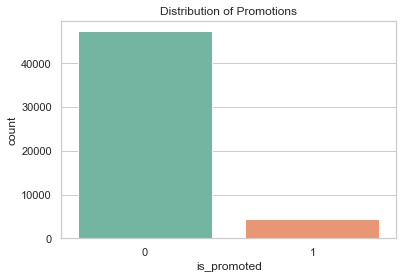

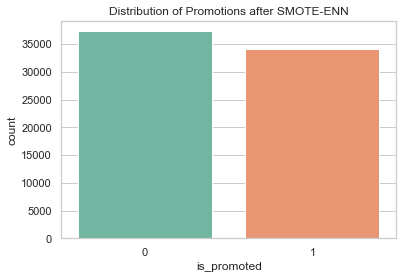

In [59]:
from imblearn.combine import SMOTEENN

plt.figure(figsize=(6, 4))
sns.countplot(x='is_promoted', data=hr_df, palette='Set2')
plt.title('Distribution of Promotions')
plt.show()

# Apply SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(hr_df.drop('is_promoted', axis=1), hr_df['is_promoted'])

# Plot the distribution of the target variable 'is_promoted' after resampling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='Set2')
plt.title('Distribution of Promotions after SMOTE-ENN')
plt.show()

In [60]:
hr_df_balanced = pd.DataFrame(X_resampled, columns=hr_df.columns[:-1])  # Exclude the target variable
hr_df_balanced['is_promoted'] = y_resampled

In [61]:
hr_df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71331 entries, 0 to 71330
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   previous_year_rating  71331 non-null  float64
 1   length_of_service     71331 non-null  float64
 2   KPIs_met >80%         71331 non-null  int64  
 3   awards_won            71331 non-null  int64  
 4   avg_training_score    71331 non-null  int64  
 5   loyalty               71331 non-null  float64
 6   overall_rating        71331 non-null  float64
 7   training_intensity    71331 non-null  int64  
 8   is_promoted           71331 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 4.9 MB


### 1.3 Correlation Analysis

#### 1.3.2 Heatmap

In [62]:
numerical_columns = hr_df.describe().columns
print(numerical_columns)

Index(['previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won', 'avg_training_score', 'loyalty', 'overall_rating',
       'training_intensity', 'is_promoted'],
      dtype='object')


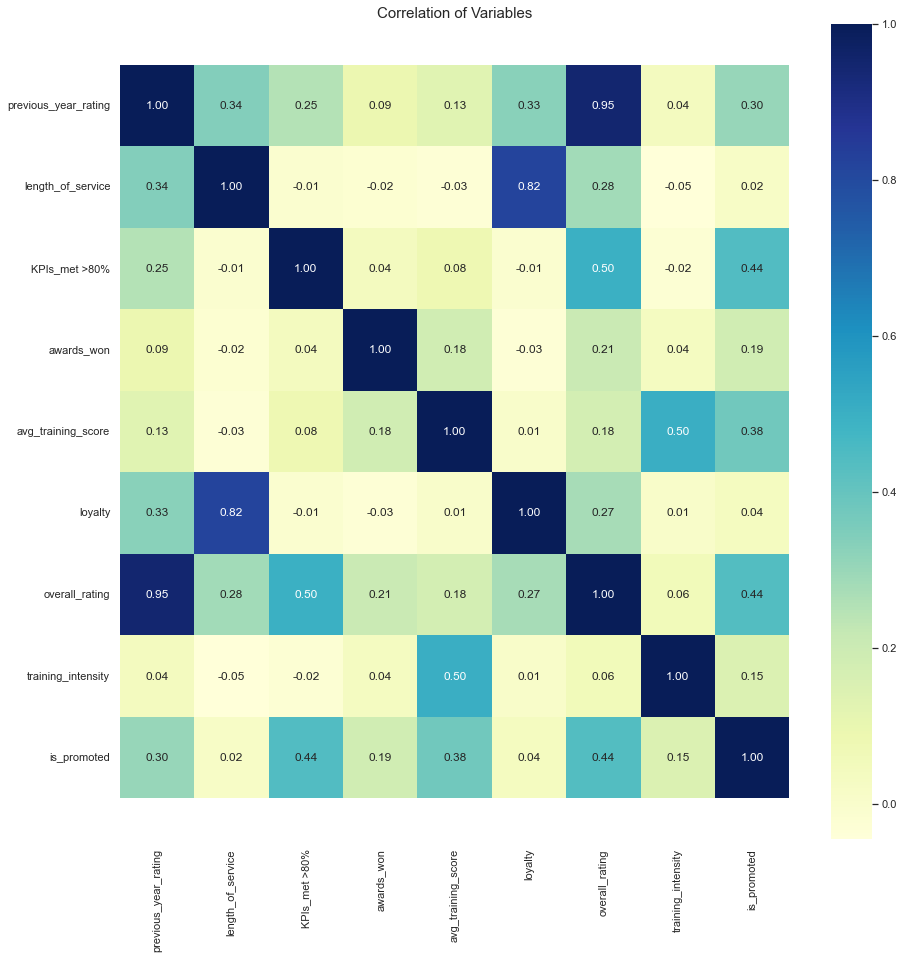

In [63]:
plt.figure(figsize=(15,15))
plt.title('Correlation of Variables', size=15)
corr_matrix = hr_df_balanced.astype(float).corr()

# Display correlation values as text
ax = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The refined dataset now exclusively consists of numerical values and features with potential significance. For a comprehensive understanding of each feature or column, you can consult the brief descriptions provided below, akin to a data dictionary.

* **previous_year_rating**: Rating for the previous year from 0 to 5
* **length_of_service**: Log transformed to improve skewness
* **KPIs_met >80%**: 0 = No, 1 = Yes
* **awards_won**: 0 = No, 1 = Yes
* **avg_training_score**: Average score in current training evaluations
* **loyalty**: Calculation between Age and length of service 
* **overall_rating**: Calculation created using performance indicators ('previous_year_rating','KPIs_met >80%','awards_won')
* **training_intensity**: Calculation based on 'number_of_trainings' and 'avg_training_score'
* **is_promoted**: 0 = No, 1 = Yes

### 1.4 Export the data

In [64]:
hr_df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71331 entries, 0 to 71330
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   previous_year_rating  71331 non-null  float64
 1   length_of_service     71331 non-null  float64
 2   KPIs_met >80%         71331 non-null  int64  
 3   awards_won            71331 non-null  int64  
 4   avg_training_score    71331 non-null  int64  
 5   loyalty               71331 non-null  float64
 6   overall_rating        71331 non-null  float64
 7   training_intensity    71331 non-null  int64  
 8   is_promoted           71331 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 4.9 MB


In [65]:
hr_df_balanced.to_csv('hr_data_new.csv', index = False)

## 2. Airbnb

### 2.1 Load and Explore the data

In [66]:
df_bnb = pd.read_csv("listings.csv")
df_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [67]:
numerical_columns = df_bnb.describe().columns
print(numerical_columns)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


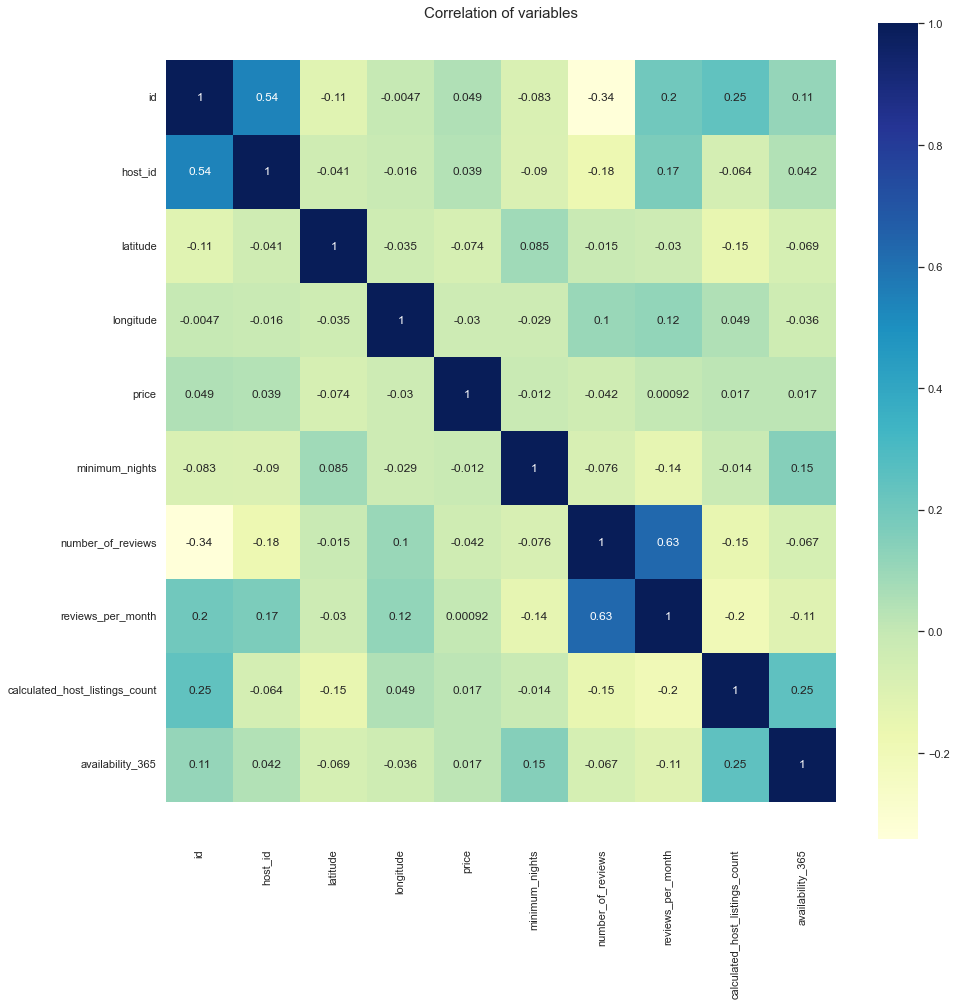

In [68]:
plt.figure(figsize=(15,15))
plt.title('Correlation of variables', size=15)
ax = sns.heatmap(df_bnb[numerical_columns].corr(), cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [69]:
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

#### 2.1.2 Basic Cleaning

In [70]:
bnb_num = df_bnb.select_dtypes(include=['int64', 'float64'])

# Displaying the categorical DataFrame
bnb_num.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [71]:
df_bnb = df_bnb[df_bnb['price'] != 0]

df_bnb.reset_index(drop=True, inplace=True)

#### 2.1.3 Visualisation analysis

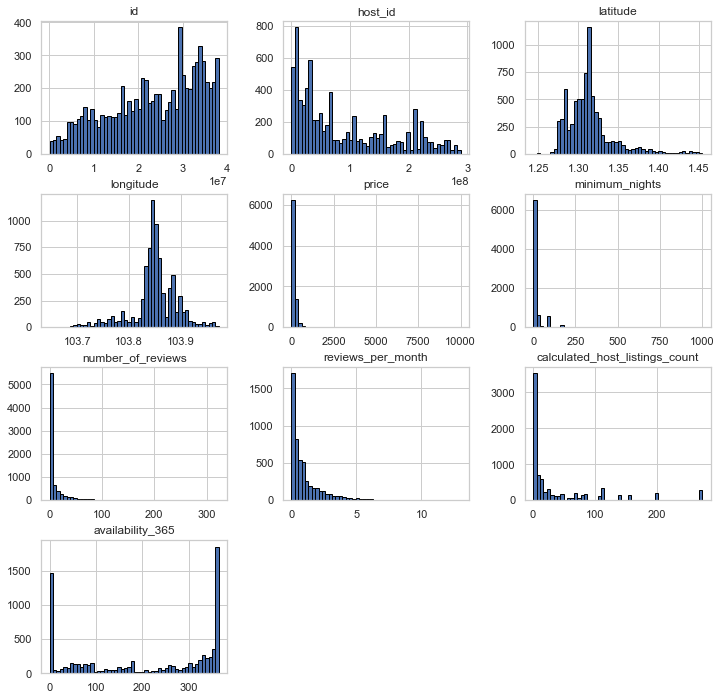

In [72]:
df_bnb.hist(edgecolor='black', linewidth=1, figsize=(12, 12), bins =50)
plt.show()

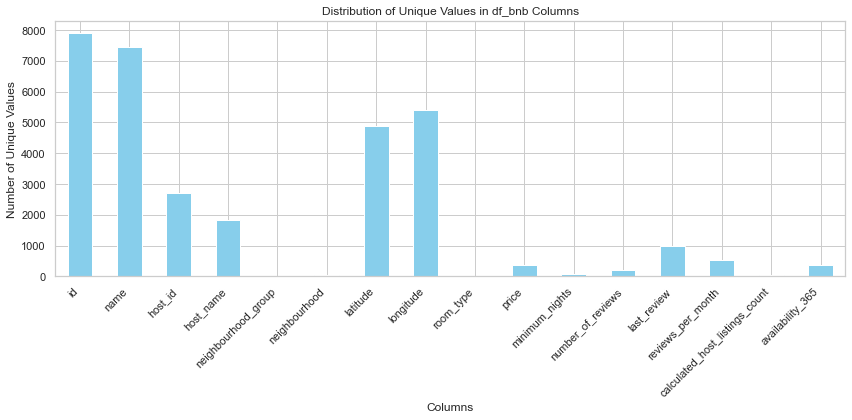

In [73]:
unique_value_counts = df_bnb.nunique()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
unique_value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Unique Values in df_bnb Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

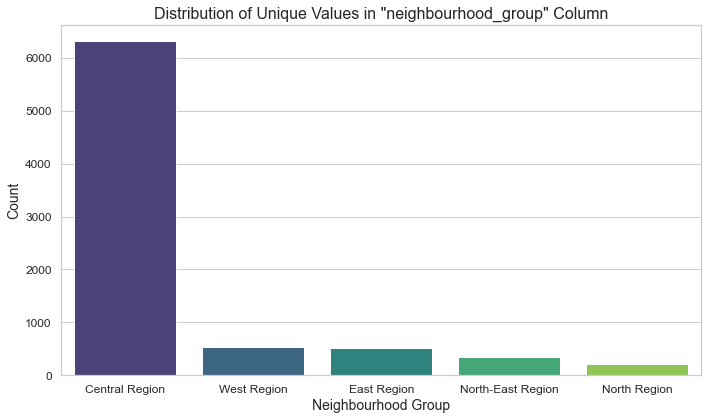

In [74]:
sns.set(style="whitegrid")

# Assuming df_bnb is your DataFrame
neighbourhood_group_counts = df_bnb['neighbourhood_group'].value_counts()

# Plotting the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=neighbourhood_group_counts.index, y=neighbourhood_group_counts.values, palette="viridis")
plt.title('Distribution of Unique Values in "neighbourhood_group" Column', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

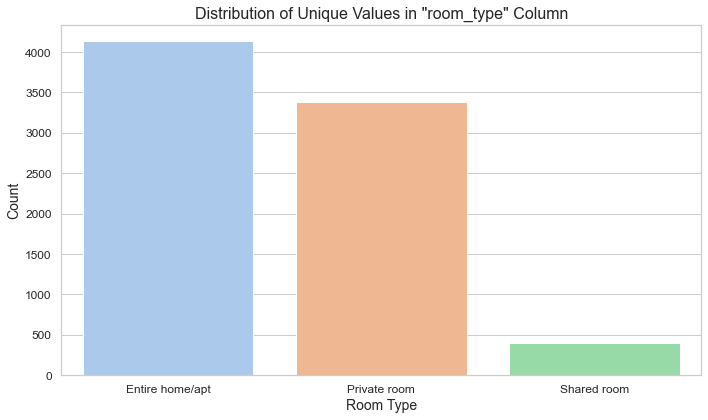

In [75]:
sns.set(style="whitegrid")

# Assuming df_bnb is your DataFrame
room_type_counts = df_bnb['room_type'].value_counts()

# Choose a different color palette for variety
color_palette = sns.color_palette("pastel")

# Plotting the bar chart with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette=color_palette)
plt.title('Distribution of Unique Values in "room_type" Column', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [76]:
plt.figure(figsize=(12, 8))

# Assuming df_bnb is your DataFrame
# Replace df_bnb with the actual name of your DataFrame if it's different

img = plt.imread("sg_map.jpg")
plt.imshow(img, extent=[103.5, 104.2, 1.15, 1.5])

# Get unique neighbourhood groups in the DataFrame
neighbourhood_groups = df_bnb['neighbourhood_group'].unique()

# Exclude blue from the husl palette
colors_to_exclude = ['blue']
color_palette = [color for color in sns.color_palette('husl', len(neighbourhood_groups) + 1) if color not in sns.xkcd_palette(colors_to_exclude)]

# Dynamically generate distinct colors for each neighbourhood_group
color_mapping = dict(zip(neighbourhood_groups, color_palette))

# Scatter plot with color-coded markers
sns.scatterplot(data=df_bnb, x='longitude', y='latitude', hue='neighbourhood_group', palette=color_mapping, s=50, edgecolor='w', linewidth=0.5)

# Add legend
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map Visualization by Neighbourhood Group')

# Display the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sg_map.jpg'

<Figure size 864x576 with 0 Axes>

In [77]:
plt.figure(figsize=(12, 8))

# Assuming df_bnb is your DataFrame
# Replace df_bnb with the actual name of your DataFrame if it's different

img = plt.imread("mrt_map.jfif")
plt.imshow(img, extent=[103.5, 104.2, 1.2, 1.49])

# Get unique neighbourhood groups in the DataFrame
neighbourhood_groups = df_bnb['neighbourhood_group'].unique()

# Exclude blue from the husl palette
colors_to_exclude = ['blue']
color_palette = [color for color in sns.color_palette('husl', len(neighbourhood_groups) + 1) if color not in sns.xkcd_palette(colors_to_exclude)]

# Dynamically generate distinct colors for each neighbourhood_group
color_mapping = dict(zip(neighbourhood_groups, color_palette))

# Scatter plot with color-coded markers
sns.scatterplot(data=df_bnb, x='longitude', y='latitude', hue='neighbourhood_group', palette=color_mapping, s=50, edgecolor='w', linewidth=0.5)

# Add legend
plt.legend(title='Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map Visualization by Neighbourhood Group with MRT lines')

# Display the plot
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'mrt_map.jfif'

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

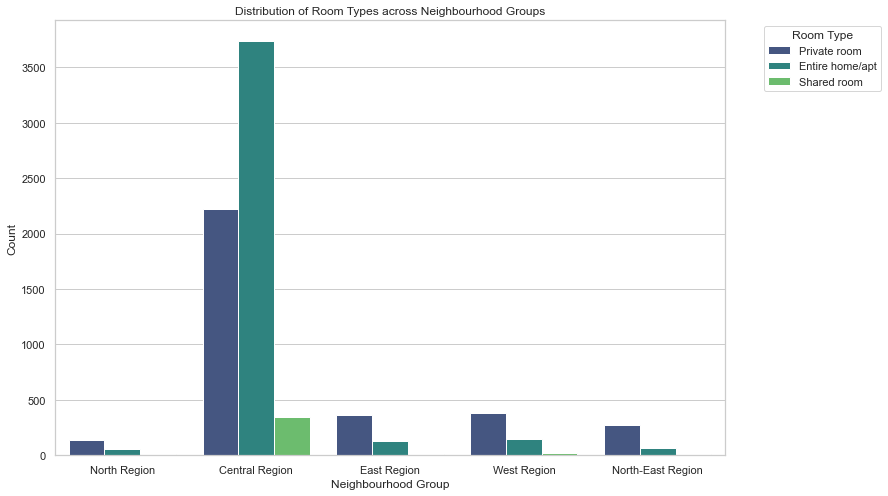

In [78]:
plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df_bnb, palette='viridis')

# Add labels and title
plt.title('Distribution of Room Types across Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

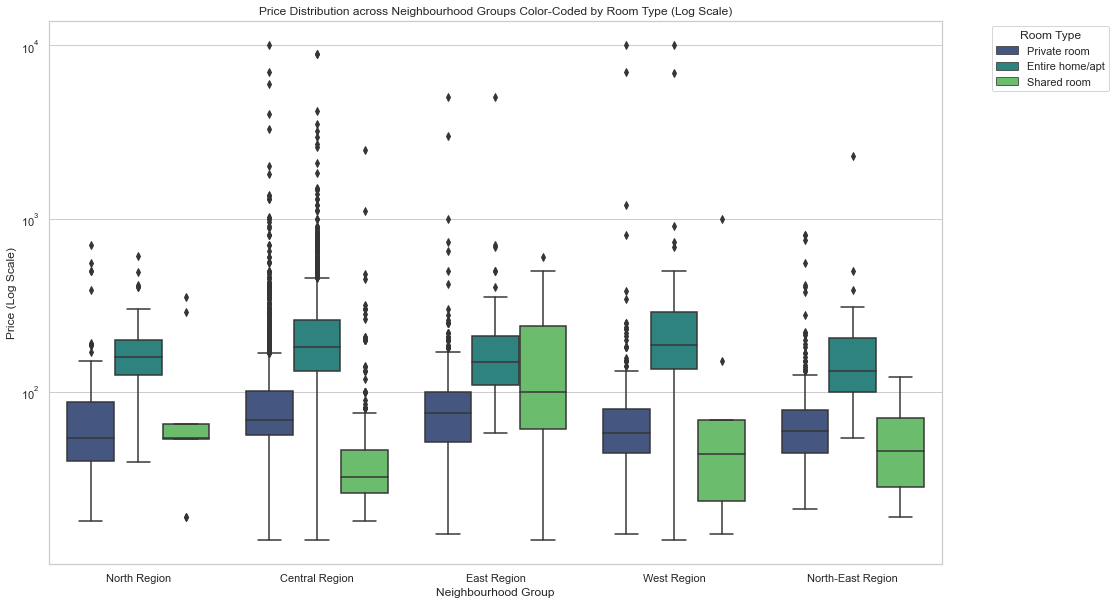

In [79]:
sns.set(style="whitegrid")

# Create a box plot with log scale on the y-axis
plt.figure(figsize=(16, 10))
sns.boxplot(x="neighbourhood_group", y="price", hue="room_type", data=df_bnb, palette="viridis")
plt.yscale('log')  # Set the y-axis to log scale

# Add labels and title
plt.title("Price Distribution across Neighbourhood Groups Color-Coded by Room Type (Log Scale)")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price (Log Scale)")

# Add legend
plt.legend(title="Room Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

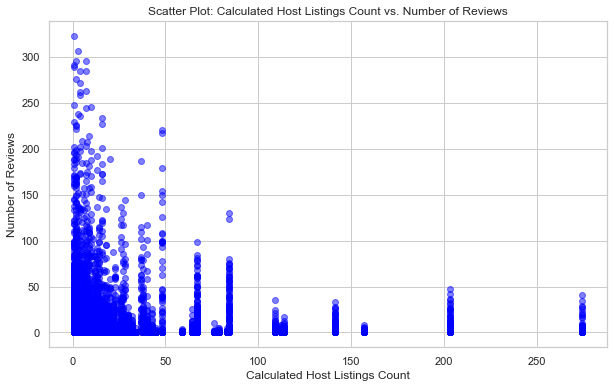

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(df_bnb['calculated_host_listings_count'], df_bnb['number_of_reviews'], alpha=0.5, color='blue')
plt.title('Scatter Plot: Calculated Host Listings Count vs. Number of Reviews')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

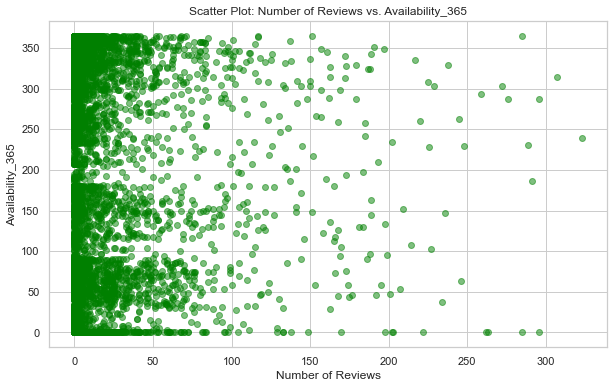

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(df_bnb['number_of_reviews'], df_bnb['availability_365'], alpha=0.5, color='green')
plt.title('Scatter Plot: Number of Reviews vs. Availability_365')
plt.xlabel('Number of Reviews')
plt.ylabel('Availability_365')
plt.grid(True)
plt.show()

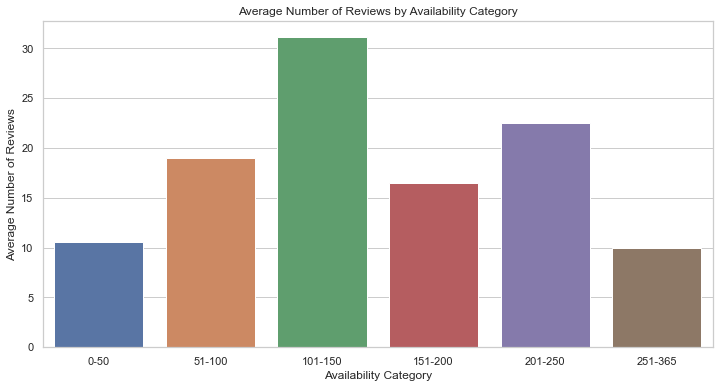

In [82]:
# Create a new column for availability categories
df_bnb['availability_category'] = pd.cut(df_bnb['availability_365'], bins=[-1, 50, 100, 150, 200, 250, 365], labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-365'])

# Plot the average number of reviews for each availability category
plt.figure(figsize=(12, 6))
sns.barplot(x='availability_category', y='number_of_reviews', data=df_bnb, ci=None)
plt.title('Average Number of Reviews by Availability Category')
plt.xlabel('Availability Category')
plt.ylabel('Average Number of Reviews')
plt.show()

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='price', data=df_bnb, order=df_bnb.groupby('neighbourhood')['price'].median().sort_values().index)
plt.title('Distribution of Price in Different Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right') 
plt.show() 

In [ ]:
# Apply log transformation to the price variable
df_bnb['log_price'] = np.log1p(df_bnb['price'])  # Using log1p to handle zero values

plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood', y='log_price', data=df_bnb, order=df_bnb.groupby('neighbourhood')['log_price'].median().sort_values().index)
plt.title('Distribution of Log-Transformed Price in Different Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Log-Transformed Price')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [ ]:
# Calculate the ratio of host listings to total listings in the neighborhood
df_bnb['host_listings_ratio'] = df_bnb.groupby('neighbourhood')['calculated_host_listings_count'].transform(lambda x: x / x.sum())

# Plot the average host listings ratio for each neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood', y='host_listings_ratio', data=df_bnb, ci=None)
plt.title('Host Listings Ratio by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Host Listings Ratio')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_bnb['minimum_nights'], df_bnb['price'], alpha=0.5)
plt.title('Minimum Nights vs. Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### 2.2 Cleanse and Transform the data

<!-- Log-Transformed Price: Since the price variable seems to have a wide range with potential outliers, you could create a log-transformed version of the price. This can help make the target variable more normally distributed.

Host Experience: You could create a feature indicating the host's experience by using the calculated_host_listings_count and the number_of_reviews. This could be a measure of how active and experienced the host is.

Reviews per Availability: Create a feature that represents the ratio of the number of reviews to the availability. This could capture the level of engagement or interest in the property.

Location Features: Consider creating features based on the latitude and longitude, such as distance from the city center or distance from popular landmarks. These features could capture the property's location in a more meaningful way.

Minimum Nights Indicator: Instead of using the exact minimum nights, you could create a binary indicator feature that flags whether the minimum nights requirement is above a certain threshold.

Availability Ratio: Create a feature that represents the ratio of actual availability to the total possible availability (365 days). This could provide insights into how often the property is available.

Host Listing Density: Create a feature that represents the density of listings in the neighborhood. It could be calculated as the ratio of the number of listings by the host to the total number of listings in the neighborhood. -->

#### 2.2.1 Handling nulls

In [ ]:
df_bnb.info()

In [ ]:
df_bnb.isnull().sum()

In [ ]:
df_bnb = df_bnb[df_bnb['name'].notna()]
df_bnb.count()

In [ ]:
df_bnb['last_review'] = pd.to_datetime(df_bnb['last_review'], format='%Y/%m/%d')
df_bnb['last_review'].head()

In [ ]:
current_date = datetime.now()
df_bnb['last_review'] = (current_date - df_bnb['last_review']).dt.days

In [ ]:
df_bnb = df_bnb.dropna(subset=['last_review'])

In [ ]:
df_bnb.isnull().sum()

#### 2.2.2 Subsetting region

In [ ]:
df_bnb = df_bnb[df_bnb['neighbourhood_group'] == 'Central Region']

In [ ]:
print(df_bnb['neighbourhood_group'].unique())

In [ ]:
df_bnb.info()

In [ ]:
df_bnb.describe()

#### 2.2.3 Transforming variables

In [ ]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
diagnostic_plots(df_bnb, 'price')
s=str(df_bnb['price'].skew())
print("Skew: "+s)

In [ ]:
diagnostic_plots(df_bnb, 'log_price')
s=str(df_bnb['log_price'].skew())
print("Skew: "+s)

In [ ]:
diagnostic_plots(df_bnb, 'last_review')
s=str(df_bnb['last_review'].skew())
print("Skew: "+s)

In [ ]:
df_bnb['last_review'] = np.log1p(df_bnb['last_review']) 

In [ ]:
diagnostic_plots(df_bnb, 'last_review')
s=str(df_bnb['last_review'].skew())
print("Skew: "+s)

In [ ]:
diagnostic_plots(df_bnb, 'calculated_host_listings_count')
s=str(df_bnb['calculated_host_listings_count'].skew())
print("Skew: "+s)

In [ ]:
df_bnb['calculated_host_listings_count'] = np.log1p(df_bnb['calculated_host_listings_count'])

In [ ]:
diagnostic_plots(df_bnb, 'calculated_host_listings_count')
s=str(df_bnb['calculated_host_listings_count'].skew())
print("Skew: "+s)

#### 2.2.4 Handling outliers

In [ ]:
# Calculate quartiles and interquartile range (IQR)
lq = np.percentile(df_bnb['price'], 25)
uq = np.percentile(df_bnb['price'], 75)
iqr = uq - lq

# Define a threshold for potential outliers (e.g., 1.5 times IQR beyond UQ)
outlier_threshold = uq + 5 * iqr

plt.figure(figsize=(10, 6))

# Density plot
sns.kdeplot(df_bnb['price'], fill=True, color='skyblue', alpha=0.5)

# Vertical lines for quartiles and outlier threshold
plt.axvline(x=lq, linestyle='--', color='orange', label='Lower Quartile (LQ)')
plt.axvline(x=uq, linestyle='--', color='green', label='Upper Quartile (UQ)')
plt.axvline(x=lq - 1.5 * iqr, linestyle='--', color='purple', label='Lower Bound (Outliers)')
plt.axvline(x=uq + 1.5 * iqr, linestyle='--', color='purple', label='Upper Bound (Outliers)')
plt.axvline(x=outlier_threshold, linestyle='--', color='red', label='Outlier Threshold')

plt.title('Density Plot of Price with Quartiles and Outliers')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
Q1,Q3 = np.percentile(df_bnb['price'] , [25,75])
IQR = Q3 - Q1
upper_range_iqr = Q3 + (1.5 * IQR)

df_bnb.drop(df_bnb[(df_bnb.price > upper_range_iqr)].index , inplace=True)

df_bnb['price'].max()

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df_bnb, x="price", kde=True, bins=20, color='#E69A8DFF')
plt.title("Distribution of Pricing After Removing Outliers")
plt.show()

In [ ]:

# Calculate quartiles and interquartile range (IQR)
lq = np.percentile(df_bnb['minimum_nights'], 25)
uq = np.percentile(df_bnb['minimum_nights'], 75)
iqr = uq - lq

# Define a threshold for potential outliers (e.g., 1.5 times IQR beyond UQ)
outlier_threshold = uq + 15 * iqr

plt.figure(figsize=(10, 6))

# Density plot
sns.kdeplot(df_bnb['minimum_nights'], fill=True, color='skyblue', alpha=0.5)

# Vertical lines for quartiles and outlier threshold
plt.axvline(x=lq, linestyle='--', color='orange', label='Lower Quartile (LQ)')
plt.axvline(x=uq, linestyle='--', color='green', label='Upper Quartile (UQ)')
plt.axvline(x=lq - 1.5 * iqr, linestyle='--', color='purple', label='Lower Bound (Outliers)')
plt.axvline(x=uq + 1.5 * iqr, linestyle='--', color='purple', label='Upper Bound (Outliers)')
plt.axvline(x=outlier_threshold, linestyle='--', color='red', label='Outlier Threshold')

plt.title('Density Plot of Minimum Nights with Quartiles and Outliers')
plt.xlabel('Minimum Nights')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# dropping outliers based on 3 stdev away from mean
average = df_bnb["minimum_nights"].mean()
stdev = df_bnb["minimum_nights"].std()
#Defining outliers range
outlier_range = average + (3 * stdev)
df_bnb.drop(df_bnb[(df_bnb.minimum_nights > outlier_range)].index , inplace=True)

In [ ]:
plt.figure(figsize=(10, 6))

# Density plot
sns.kdeplot(df_bnb['minimum_nights'], fill=True, color='skyblue', alpha=0.5)

# Vertical lines for quartiles and outlier threshold
plt.axvline(x=lq, linestyle='--', color='orange', label='Lower Quartile (LQ)')
plt.axvline(x=uq, linestyle='--', color='green', label='Upper Quartile (UQ)')
plt.axvline(x=lq - 1.5 * iqr, linestyle='--', color='purple', label='Lower Bound (Outliers)')
plt.axvline(x=uq + 1.5 * iqr, linestyle='--', color='purple', label='Upper Bound (Outliers)')

plt.title('Density Plot of Minimum Nights with Quartiles and Outliers')
plt.xlabel('Minimum Nights')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Calculate quartiles and interquartile range (IQR) for reviews_per_month
lq_reviews = np.percentile(df_bnb['reviews_per_month'], 25)
uq_reviews = np.percentile(df_bnb['reviews_per_month'], 75)
iqr_reviews = uq_reviews - lq_reviews

# Define a threshold for potential outliers (e.g., 1.5 times IQR beyond UQ)
outlier_threshold_reviews = uq_reviews + 1.5 * iqr_reviews

plt.figure(figsize=(10, 6))

# Density plot for reviews_per_month
sns.kdeplot(df_bnb['reviews_per_month'], fill=True, color='skyblue', alpha=0.5)

# Vertical lines for quartiles and outlier threshold for reviews_per_month
plt.axvline(x=lq_reviews, linestyle='--', color='orange', label='Lower Quartile (LQ)')
plt.axvline(x=uq_reviews, linestyle='--', color='green', label='Upper Quartile (UQ)')
plt.axvline(x=lq_reviews - 1.5 * iqr_reviews, linestyle='--', color='purple', label='Lower Bound (Outliers)')
plt.axvline(x=uq_reviews + 1.5 * iqr_reviews, linestyle='--', color='purple', label='Upper Bound (Outliers)')
plt.axvline(x=outlier_threshold_reviews, linestyle='--', color='red', label='Outlier Threshold')

plt.title('Density Plot of Reviews per Month with Quartiles and Outliers')
plt.xlabel('Reviews per Month')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# removing of outliers for reviews_per_month based on 3x stdev from mean
average = df_bnb["reviews_per_month"].mean()
stdev = df_bnb["reviews_per_month"].std()
#Defining outliers range
outlier_range = average + (3 * stdev)

#Drop
df_bnb.drop(df_bnb[(df_bnb["reviews_per_month"] > outlier_range)].index , inplace=True)

In [ ]:
# Calculate quartiles and interquartile range (IQR) for reviews_per_month
lq_reviews = np.percentile(df_bnb['reviews_per_month'], 25)
uq_reviews = np.percentile(df_bnb['reviews_per_month'], 75)
iqr_reviews = uq_reviews - lq_reviews


plt.figure(figsize=(10, 6))

# Density plot for reviews_per_month
sns.kdeplot(df_bnb['reviews_per_month'], fill=True, color='skyblue', alpha=0.5)

# Vertical lines for quartiles and outlier threshold for reviews_per_month
plt.axvline(x=lq_reviews, linestyle='--', color='orange', label='Lower Quartile (LQ)')
plt.axvline(x=uq_reviews, linestyle='--', color='green', label='Upper Quartile (UQ)')
plt.axvline(x=lq_reviews - 1.5 * iqr_reviews, linestyle='--', color='purple', label='Lower Bound')
plt.axvline(x=uq_reviews + 1.5 * iqr_reviews, linestyle='--', color='purple', label='Upper Bound')
plt.title('Density Plot of Reviews per Month with Quartiles and Outliers')
plt.xlabel('Reviews per Month')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Calculate quartiles and interquartile range (IQR) for number_of_reviews
lq_reviews_num = np.percentile(df_bnb['number_of_reviews'], 25)
uq_reviews_num = np.percentile(df_bnb['number_of_reviews'], 75)
iqr_reviews_num = uq_reviews_num - lq_reviews_num

# Define a threshold for potential outliers (e.g., 1.5 times IQR beyond UQ)
outlier_threshold_reviews_num = uq_reviews_num + 5 * iqr_reviews_num

plt.figure(figsize=(10, 6))

# Show a histplot for number_of_reviews
sns.histplot(df_bnb['number_of_reviews'], bins=30, kde=True, color='skyblue')

# Vertical lines for quartiles and outlier threshold for number_of_reviews
plt.axvline(x=lq_reviews_num, linestyle='--', color='orange', label='Lower Quartile (LQ)')
plt.axvline(x=uq_reviews_num, linestyle='--', color='green', label='Upper Quartile (UQ)')
plt.axvline(x=lq_reviews_num - 1.5 * iqr_reviews_num, linestyle='--', color='purple', label='Lower Bound (Outliers)')
plt.axvline(x=uq_reviews_num + 1.5 * iqr_reviews_num, linestyle='--', color='purple', label='Upper Bound (Outliers)')
plt.axvline(x=outlier_threshold_reviews_num, linestyle='--', color='red', label='Outlier Threshold')

plt.title('Histplot of Number of Reviews with Quartiles and Outliers')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Calculate quartiles and interquartile range (IQR) for number_of_reviews
lq_reviews_num = np.percentile(df_bnb['number_of_reviews'], 25)
uq_reviews_num = np.percentile(df_bnb['number_of_reviews'], 75)
iqr_reviews_num = uq_reviews_num - lq_reviews_num

# Define a threshold for potential outliers (e.g., 1.5 times IQR beyond UQ)
outlier_threshold_reviews_num = uq_reviews_num + 5 * iqr_reviews_num

# Filter DataFrame to exclude outliers for number_of_reviews
df_bnb = df_bnb[df_bnb['number_of_reviews'] <= outlier_threshold_reviews_num]

In [ ]:
# Calculate quartiles and interquartile range (IQR) for number_of_reviews
lq_reviews_num = np.percentile(df_bnb['number_of_reviews'], 25)
uq_reviews_num = np.percentile(df_bnb['number_of_reviews'], 75)
iqr_reviews_num = uq_reviews_num - lq_reviews_num

plt.figure(figsize=(10, 6))

# Show a histplot for number_of_reviews
sns.histplot(df_bnb['number_of_reviews'], bins=30, kde=True, color='skyblue')

# Vertical lines for quartiles and outlier threshold for number_of_reviews
plt.axvline(x=lq_reviews_num, linestyle='--', color='orange', label='Lower Quartile (LQ)')
plt.axvline(x=uq_reviews_num, linestyle='--', color='green', label='Upper Quartile (UQ)')
plt.axvline(x=lq_reviews_num - 1.5 * iqr_reviews_num, linestyle='--', color='purple', label='Lower Bound (Outliers)')
plt.axvline(x=uq_reviews_num + 1.5 * iqr_reviews_num, linestyle='--', color='purple', label='Upper Bound (Outliers)')

plt.title('Histplot of Number of Reviews with Quartiles and Outliers')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### 2.2.5 Mapping of catergorical variables

In [ ]:
categorical_columns = df_bnb.select_dtypes(include=['object','category']).columns

# Display unique values and counts for each categorical column
for column in categorical_columns:
    print(f"Column: {column}")
    print(df_bnb[column].value_counts())
    print("\n")

In [ ]:
print(df_bnb['room_type'].unique())

In [ ]:
df_bnb['room_type'].head(5)

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# mapping of room_type
df_bnb['room_type'] = df_bnb['room_type'].map({'Entire home/apt': 2, "Private room": 1, "Shared room": 0}).astype(int)

# Encode 'neighbourhood' columnb
df_bnb['neighbourhood'] = label_encoder.fit_transform(df_bnb['neighbourhood'])

# Encode 'availability_category' column
df_bnb['availability_category'] = df_bnb['availability_category'].map({"0-50": 0, 
                                                                       "51-100": 1, 
                                                                       "101-150": 2,
                                                                       "151-200": 3,
                                                                       "201-250": 4,
                                                                       "251-365": 5}).astype(int)

In [ ]:
df_bnb.head()

### 2.3 Correlation Analysis

#### 2.3.1 Feature engineering

In [ ]:
# Already created earlier in the visualisation analysis

# df_bnb['availability_category'] = pd.cut(df_bnb['availability_365'], bins=[-1, 50, 100, 150, 200, 250, 365], labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-365'])
# df_bnb['host_listings_ratio'] = df_bnb.groupby('neighbourhood')['calculated_host_listings_count'].transform(lambda x: x / x.sum())

In [ ]:
from math import radians, sin, cos, sqrt, atan2

# Load data from mrtsg.csv
mrt_df = pd.read_csv('mrtsg.csv')

# Function to calculate Haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

# Calculate distance from each listing to each MRT station
for index, listing in df_bnb.iterrows():
    distances = mrt_df.apply(lambda row: haversine_distance(listing['latitude'], listing['longitude'], row['latitude'], row['longitude']), axis=1)
    closest_mrt_index = distances.idxmin()
    closest_mrt_distance = distances[closest_mrt_index]
    df_bnb.at[index, 'distance_from_mrt'] = closest_mrt_distance

# Display the 'distance_from_mrt' column
print(df_bnb['distance_from_mrt'])

In [ ]:
df_bnb['distance_from_mrt'].describe()

In [ ]:
# Step 1: Calculate the Ratio
df_bnb['reviews_per_availability_ratio'] = df_bnb['number_of_reviews'] / (df_bnb['availability_365'] + 1)  # Adding 1 to avoid division by zero

# Step 2: Display the modified DataFrame
print(df_bnb[['number_of_reviews', 'availability_365', 'reviews_per_availability_ratio']])

In [ ]:
# Calculate Host Experience
df_bnb['host_experience'] = df_bnb['calculated_host_listings_count'] * df_bnb['number_of_reviews']

# Display the modified DataFrame
print(df_bnb[['calculated_host_listings_count', 'number_of_reviews', 'host_experience']])

In [ ]:
# Check if NLTK stopwords are available, otherwise use the built-in set
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

In [ ]:
# Load stop words
stop_words = set(stopwords.words('english'))


# Clean and preprocess 'name' column
df_bnb['name'] = df_bnb['name'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()) if pd.notna(x) else '')

# Remove numbers from the 'name' column
df_bnb['name'] = df_bnb['name'].apply(lambda x: re.sub(r'[0-9]+', '', x))

# Remove stopwords from the 'name' column
df_bnb['name'] = df_bnb['name'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words]))


# Extract common words and rank them
common_words = pd.Series(' '.join(df_bnb['name']).split()).value_counts()
sorted_common_words = common_words.index.tolist()

# Assign keywords to 'name' based on common words
for word in sorted_common_words:
    df_bnb['name'] = np.where(df_bnb['name'].str.contains(word), word, df_bnb['name'])

# Filter out non-English and non-alphabetical names
df_bnb = df_bnb[df_bnb['name'].apply(lambda x: x.isascii())]

# Visualize average prices for different keywords
temp_df = df_bnb.groupby('name', as_index=False)['price'].mean().sort_values('price')
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='name', y='price', data=temp_df)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize='10')
plt.show()

# Map names to indices
name_mapping = {name: idx for idx, name in enumerate(temp_df['name'])}
df_bnb['name'] = df_bnb['name'].map(name_mapping)

#### 2.3.2 Heatmap

In [ ]:
df_bnb.info()

In [ ]:
columns_list = df_bnb.columns.tolist()
print(columns_list)

In [ ]:
df_bnb_corr = df_bnb[['id', 'name', 'host_id', 
                       'room_type',
                      'reviews_per_month', 'calculated_host_listings_count',
                      'host_listings_ratio', 'distance_from_mrt', 'reviews_per_availability_ratio', 'host_experience'
                     ,'price']]

plt.figure(figsize=(15,15))
plt.title('Correlation of variables', size=15)
ax = sns.heatmap(df_bnb_corr.astype(float).corr(), cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The refined dataset now exclusively consists of numerical values and features with potential significance. For a comprehensive understanding of each feature or column, you can consult the brief descriptions provided below, akin to a data dictionary.

* **id**: Unique Identifier for each property
* **name**: Used an evaluator to gather meaningful information from name
* **host_id**: Unique Identifier for each host
* **room_type**: Type of room (ordinal encoded)
* **reviews_per_month**: Number of reviews per month
* **calculated_host_listings_count**: Number of listings per host
* **host_listings_ratio**: Calculation based on 'calculated_host_listing_ratio' and 'neighbourhood'
* **distance_from_mrt**: Distance from the nearest Mrt 
* **reviews_per_availability_ratio**: Calculation based on 'number_pf_reviews' and 'availability_365'
* **host_experience**: Calculation based on 'calculated_host_listing_ratio' and 'number_of_reviews'
* **price**: Price of the property

#### 2.3.3 Dropping columns

In [ ]:
df_bnb = df_bnb[['id', 'name', 'host_id', 
                       'room_type',
                      'reviews_per_month', 'calculated_host_listings_count',
                      'host_listings_ratio', 'distance_from_mrt', 'reviews_per_availability_ratio', 'host_experience'
                     ,'price']]

### 2.4 Export the data

In [ ]:
df_bnb.info()

In [ ]:
df_bnb.to_csv('listings_new.csv', index = False)